<a href="https://colab.research.google.com/github/G-forcemole/customer-churn-prediction/blob/main/telco_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello! this project is currently under construction.

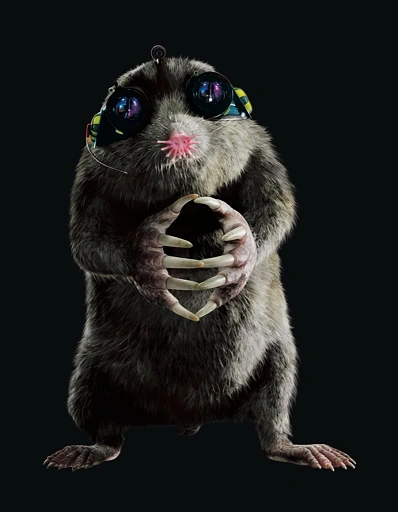

# Telco Customer Churn EDA (Exploritary Data Analysis)

Customer churn directly impacts revenue and customer lifetime value.  
This project analyzes customer behavior and attributes, then builds a churn prediction model to identify at risk customers and key drivers of churn.

### EDA Objectives
- Understand overall churn distribution
- Identify customer segments with higher churn risk
- Explore relationships between churn and contract, tenure, and billing characteristics

In [1]:
# IMPORTS & LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

## Data Loading
We use a preprocessed CSV for this exploratory analysis.  
The file is uploaded to the notebook environment and loaded into Google Colab for analysis.



**Note:**  If the preprocessed CSV is not available locally, it can be downloaded from the `data/processed` directory in the GitHub repository. <a href ="https://github.com/G-forcemole/customer-churn-prediction">GitHub</a>

In [3]:
df = pd.read_csv("telco_customer_churn_clean.csv")

In [4]:
df.head()

,customerid,is_male,is_senior,has_partner,has_dependents,tenure,has_phone_service,has_multiple_lines,internetservice,has_internet,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,is_paperless,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,f,f,t,f,1,f,NaN,DSL,t,...,No,No,No,No,Month-to-month,t,Electronic check,29.85,29.85,f
1,5575-GNVDE,t,f,f,f,34,t,f,DSL,t,...,Yes,No,No,No,One year,f,Mailed check,56.95,1889.50,f
2,3668-QPYBK,t,f,f,f,2,t,f,DSL,t,...,No,No,No,No,Month-to-month,t,Mailed check,53.85,108.15,t
3,7795-CFOCW,t,f,f,f,45,f,NaN,DSL,t,...,Yes,Yes,No,No,One year,f,Bank transfer (automatic),42.30,1840.75,f
4,9237-HQITU,f,f,f,f,2,t,f,Fiber optic,t,...,No,No,No,No,Month-to-month,t,Electronic check,70.70,151.65,t


In [5]:
shpe = df.shape
print(f"The dataset has {shpe[0]} rows and {shpe[1]} columns.")

The dataset has 7043 rows and 22 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerid          7043 non-null   object 
 1   is_male             7043 non-null   object 
 2   is_senior           7043 non-null   object 
 3   has_partner         7043 non-null   object 
 4   has_dependents      7043 non-null   object 
 5   tenure              7043 non-null   int64  
 6   has_phone_service   7043 non-null   object 
 7   has_multiple_lines  6361 non-null   object 
 8   internetservice     7043 non-null   object 
 9   has_internet        7043 non-null   object 
 10  onlinesecurity      5517 non-null   object 
 11  onlinebackup        5517 non-null   object 
 12  deviceprotection    5517 non-null   object 
 13  techsupport         5517 non-null   object 
 14  streamingtv         5517 non-null   object 
 15  streamingmovies     5517 non-null   object 
 16  contra

In [7]:
df.duplicated().sum()

np.int64(0)

Above you can see that there are 0 duplicates in the data since we already preprocessed it.

## Churn exploration

We will now look at some of the charachteristics of the churn

In [8]:
# Chunr count (Churn = T/F)
df["churn"].value_counts()


,count
churn,
f,5174
t,1869


### Churn Distribution

Approximately **26.5%** of customers in the dataset have churned, while **73.5%** have been retained.  
This indicates a moderately imbalanced target variable, which is typical for customer churn datasets.



In [9]:
# Proportion of Churn in the data (Churn = T/F)
df["churn"].value_counts(normalize=True)

,proportion
churn,
f,0.73463
t,0.26537


In [10]:
# Number of months the customer has been with the company
df["tenure"].describe()


,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


### Tenure and Churn

Customers who churn tend to have significantly lower tenure compared to retained customers.  
The median tenure for churned customers is substantially lower, suggesting that customers are most likely to leave early in their relationship with the company.

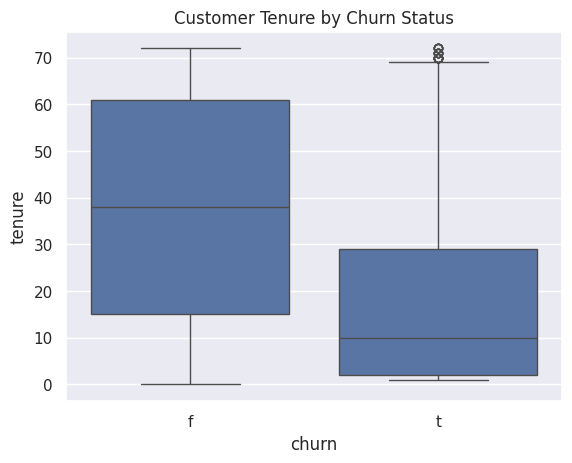

In [11]:
sns.boxplot(data=df, x="churn", y="tenure")
plt.title("Customer Tenure by Churn Status")
plt.show()

### Contract Type and Churn

Churn rates vary substantially by contract type.  
Customers on **month-to-month contracts** exhibit the highest churn rate (~43%), while customers on **one-year** and **two-year contracts** show significantly lower churn.

This suggests that longer-term contracts are strongly associated with improved customer retention.

In [12]:
pd.crosstab(df["contract"], df["churn"], normalize="index")

churn,f,t
contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


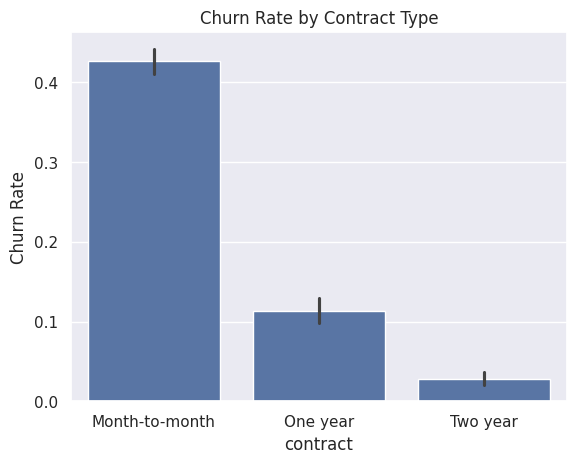

In [13]:
sns.barplot(
    data=df,
    x="contract",
    y=df["churn"].map({"t": 1, "f": 0})
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

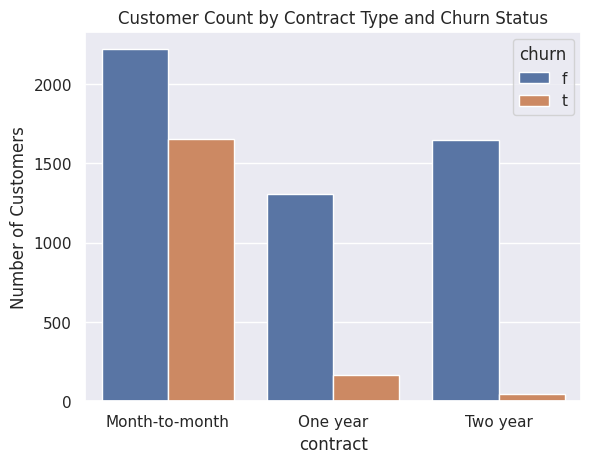

In [14]:
sns.countplot(
    data=df,
    x="contract",
    hue="churn"
)

plt.title("Customer Count by Contract Type and Churn Status")
plt.ylabel("Number of Customers")
plt.show()